## Loading the NumPy, Pandas, BeautifulSoup, MatPlotLib, Requests, JSON and Seaborn libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import json

##  Accessing website https://db-engines.com/en/ranking for scraping:

In [2]:
site = requests.get("https://db-engines.com/en/ranking").content
soup = BeautifulSoup(site,'html5lib')

## Generating Table with Ranking Database list:

In [3]:
table = soup.find('table',{'class':'dbi'}).find('tbody')
table

<tbody><tr><td colspan="99">380 systems in ranking, October 2021</td></tr><tr><td class="dbi_header" colspan="3" style="text-align:center">Rank</td><th class="dbi_header pad-l" rowspan="2" style="border-left:1px solid #aaa">DBMS</th><th class="dbi_header pad-r" rowspan="2" style="border-right:1px solid #aaa">Database Model</th><td class="dbi_header" colspan="3" style="text-align:center">Score</td></tr><tr style="line-height:100%;"><td class="dbi_header small">Oct<br/>2021</td><td class="dbi_header small">Sep<br/>2021</td><td class="dbi_header small pad-r">Oct<br/>2020</td><td class="dbi_header small pad-l">Oct<br/>2021</td><td class="dbi_header small">Sep<br/>2021</td><td class="dbi_header small">Oct<br/>2020</td></tr><tr><td>1.</td><td class="small">1.</td><td class="small pad-r">1.</td><th class="pad-l"><a href="https://db-engines.com/en/system/Oracle">Oracle <span class="info"><img alt="detailed information" height="16" src="https://db-engines.com/moreattributes.png" width="16"/><sp

## Creating lists Base and Spots to store values obtained from the site:

In [4]:
lines = table.find_all('tr')
counterLines = 0
base = []
spots = []

for line in lines:
    counterLines += 1
    if counterLines > 3:
        data = line.find_all('td')
        data2 = line.find('a')
        spots.append(float(data[3].text))
        base.append(data2.contents[0])

## Generating dataframe DataBases

In [5]:
data = pd.DataFrame(base,columns=['DataBases'])
data['Spots'] = spots

data

,DataBases,Spots
0,Oracle,1270.35
1,MySQL,1219.77
2,Microsoft SQL Server,970.61
3,PostgreSQL,586.97
4,MongoDB,493.55
...,...,...
375,SWC-DB,0.00
376,Tkrzw,0.00
377,TomP2P,0.00
378,Upscaledb,0.00


## Viewing Top 4 Databases

In [6]:
data.head()

,DataBases,Spots
0,Oracle,1270.35
1,MySQL,1219.77
2,Microsoft SQL Server,970.61
3,PostgreSQL,586.97
4,MongoDB,493.55


## Generating column chart with amount of points for a current month bank with Seaborn

<AxesSubplot:xlabel='DataBases', ylabel='Spots'>

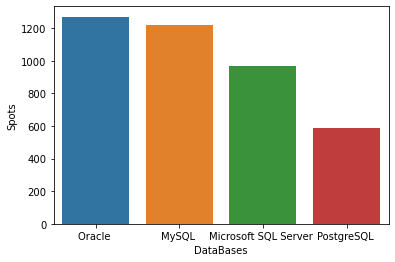

In [7]:
sns.barplot(data = data.head(4), x = 'DataBases', y = 'Spots')

**We can see that Oracle is in first place, closely followed by MySql.**

## Generating Top 10 dataframe with relevance percentage

In [8]:
dataTop10 = data.head(10)

total = dataTop10['Spots'].sum()
dataTop10['Share'] = dataTop10['Spots'] / total * 100

dataTop10

<ipython-input-8-1310e921b0c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataTop10['Share'] = dataTop10['Spots'] / total * 100


,DataBases,Spots,Share
0,Oracle,1270.35,24.034805
1,MySQL,1219.77,23.077840
2,Microsoft SQL Server,970.61,18.363775
3,PostgreSQL,586.97,11.105372
4,MongoDB,493.55,9.337882
5,Redis,171.35,3.241913
6,IBM Db2,165.96,3.139935
7,Elasticsearch,158.25,2.994063
8,SQLite,129.37,2.447658
9,Cassandra,119.28,2.256757


**Oracle has 24,034805 share in the top 10. These data were collected in October 2021.**

### Chart with MatPlotLib based on how each database is shared against the other 9 in the generated list:

<function matplotlib.pyplot.show(close=None, block=None)>

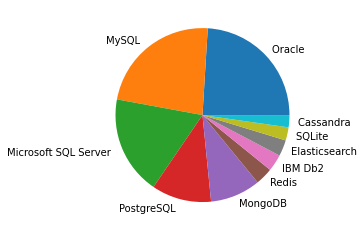

In [9]:
plt.pie(dataTop10['Share'],labels=dataTop10['DataBases'])
plt.show

**As we can see in the graph, the 3 databases Oracle, MySql and SqlServer have more than half of shares**

## Percentage of relevance of each database in relation to the others:

In [10]:
percentageRelevance = data['Spots'].sum()
data['% Relevance'] = data['Spots'] / percentageRelevance * 100

data

,DataBases,Spots,% Relevance
0,Oracle,1270.35,17.561382
1,MySQL,1219.77,16.862162
2,Microsoft SQL Server,970.61,13.417761
3,PostgreSQL,586.97,8.114303
4,MongoDB,493.55,6.822860
...,...,...,...
375,SWC-DB,0.00,0.000000
376,Tkrzw,0.00,0.000000
377,TomP2P,0.00,0.000000
378,Upscaledb,0.00,0.000000


## Creating a csv file to store the generated information: 

In [11]:
data.to_csv("db-rankink.csv")